In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from wavebench import wavebench_figure_path
from wavebench.plot_utils import remove_ticks, plot_images
from wavebench.dataloaders.helmholtz_loader import get_dataloaders_helmholtz

save_path = f'{wavebench_figure_path}/dataset_demo'

if not os.path.exists(save_path):
  os.makedirs(save_path)

## Helmholtz dataset

In [10]:
wave_data_dict = {}

for kernel_type in ['anisotropic']:
  for frequency in [10, 15, 20, 40]:

    loaders = get_dataloaders_helmholtz(kernel_type, frequency, is_elastic=True)
    a, b = next(iter(loaders['val']))

    wave_data_dict[frequency] = (a.squeeze(), b.squeeze())


In [13]:
wave_data_dict[10][1].shape

torch.Size([4, 128, 128])

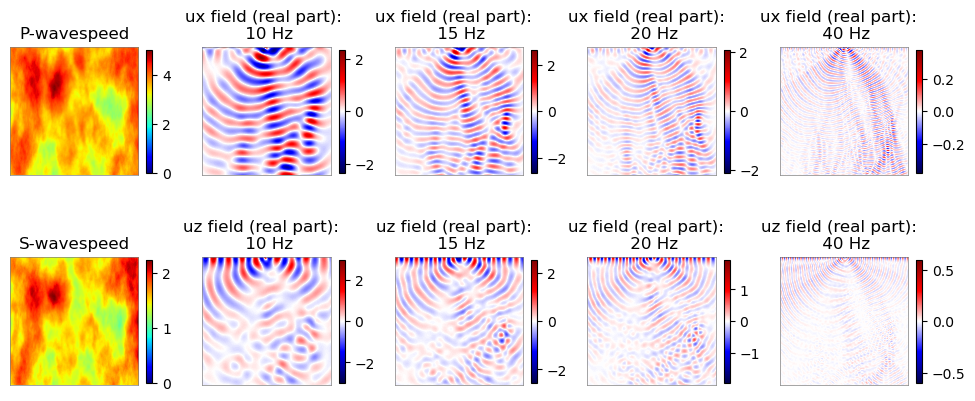

In [25]:
first_row = [
  wave_data_dict[10][0][0],
  wave_data_dict[10][1][2],
  wave_data_dict[15][1][2],
  wave_data_dict[20][1][2],
  wave_data_dict[40][1][2] ]

second_row = [
  wave_data_dict[10][0][1],
  wave_data_dict[10][1][0],
  wave_data_dict[15][1][0],
  wave_data_dict[20][1][0],
  wave_data_dict[40][1][0]]


nrows = 2
ncols = 5
fig_size = (12, 5)
cbar_shrink = 0.7
x_list = first_row + second_row
for i in range(len(x_list)):
    x_list[i] = np.asarray(x_list[i])


import numpy as np
from wavebench.plot_utils import plot_image

fig = plt.figure()
fig.set_size_inches(fig_size)
axes = fig.subplots(nrows, ncols)
im = np.empty(axes.shape, dtype=object)


vrange_ = [(-np.max(np.abs(x)), np.max(np.abs(x)) ) for x in x_list]


for i, (x, ax_, v) in enumerate(zip(x_list, axes.flat, vrange_)):
    if i ==0 or i == 5:
        im_, _ = plot_image(x, ax=ax_, vmin=0, vmax=v[1], cmap='jet')
    else:
        im_, _ = plot_image(x, ax=ax_, vmin=v[0], vmax=v[1], cmap='seismic')
    im.flat[i] = im_
    fig.colorbar(im_, ax=ax_, shrink=cbar_shrink)

axes[0,0].set_title('P-wavespeed')
axes[0,1].set_title('ux field (real part): \n 10 Hz')
axes[0,2].set_title('ux field (real part):  \n 15 Hz')
axes[0,3].set_title('ux field (real part):  \n 20 Hz')
axes[0,4].set_title('ux field (real part):  \n 40 Hz')

axes[1,0].set_title('S-wavespeed')
axes[1,1].set_title('uz field (real part):  \n 10 Hz')
axes[1,2].set_title('uz field (real part):  \n 15 Hz')
axes[1,3].set_title('uz field (real part):  \n 20 Hz')
axes[1,4].set_title('uz field (real part):  \n 40 Hz')

[remove_ticks(ax) for ax in axes.flatten()]

plt.savefig(f"{save_path}/elastic_helmholtz_demo.pdf", format="pdf", bbox_inches="tight")
